In [1]:
import cv2 as cv 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

--------hello python--------


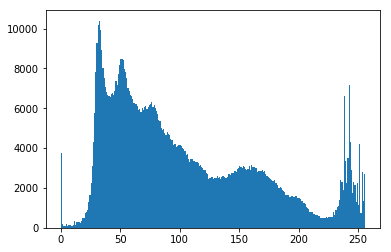

In [4]:
def plot_demo(image):
    plt.hist(image.ravel(),256,[0,256])
    plt.show('直方图')




print("--------hello python--------")
src=cv.imread('./lena.jpg')
cv.namedWindow('input image',cv.WINDOW_AUTOSIZE)
cv.imshow('input image',src)
plot_demo(src)
cv.waitKey(0)

cv.destroyAllWindows()
        

In [2]:
#直方图均衡化，用来图像增强
#全局的直方图均衡化，增加图像对比度
def equalHist_demo(image):
    gray=cv.cvtColor(image,cv.COLOR_BGR2GRAY)
    dst=cv.equalizeHist(gray)
    cv.imshow('equalHist_demo',dst)
#局部的直方图均衡化
def clahe_demo(image):
    gray=cv.cvtColor(image,cv.COLOR_BGR2GRAY)
    clahe=cv.createCLAHE(clipLimit=5.0,tileGridSize=(8,8))
    dst=clahe.apply(gray)
    cv.imshow('clahe_demo',dst)






print("--------hello python--------")
src=cv.imread('./lena.jpg')
cv.namedWindow('input image',cv.WINDOW_AUTOSIZE)
cv.imshow('input image',src)
equalHist_demo(src)
clahe_demo(src)
cv.waitKey(0)

cv.destroyAllWindows()

--------hello python--------


In [6]:
#通过直方图比较两张图片
def create_rgb_hist(image):
    h,w,c=image.shape
    rgbHist=np.zeros([16*16*16,1],np.float32)
    bsize=256/16
    for row in range(h):
        for col in range(w):
            b=image[row,col,0]
            g=image[row,col,1]
            r=image[row,col,2]
            index=np.int(b/bsize)*16*16+np.int(g/bsize)*16+np.int(r/bsize)
            rgbHist[np.int(index),0]=rgbHist[np.int(index),0]+1
    return rgbHist 

def hist_compare(m1,m2):
    hist1=create_rgb_hist(m1)
    hist2=create_rgb_hist(m2)
    match1=cv.compareHist(hist1,hist2,cv.HISTCMP_BHATTACHARYYA)
    match2=cv.compareHist(hist1,hist2,cv.HISTCMP_CORREL)
    match3=cv.compareHist(hist1,hist2,cv.HISTCMP_CHISQR)
    print('巴氏距离：%s,相关性：%s,卡方：%s'%(match1,match2,match3))






print("--------hello python--------")
src=cv.imread('./lena.jpg')
cv.namedWindow('input image',cv.WINDOW_AUTOSIZE)
cv.imshow('input image',src)
image1=cv.imread('./lena.jpg')
image2=cv.imread('./windows.jpg')
hist_compare(image1,image2)
cv.waitKey(0)

cv.destroyAllWindows()

--------hello python--------
巴氏距离：0.9877316334736447,相关性：-0.004785104301800886,卡方：283500.14816163585
